# Clasificacion de imagenes

In [1]:
#!pip install tensorflow_datasets

In [15]:
# Importar librerias
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [16]:
# Descargar el dataset'mnist'
datos, metadatos = tfds.load('mnist', as_supervised=True, with_info=True)


In [17]:
# Separar los datos de entrenamiento y de prueba
datos_entrenamiento = datos['train']
datos_prueba = datos['test']

In [18]:
# Obtener el nombre de las clases
nombre_clases = metadatos.features['label'].names
nombre_clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [19]:
# Normalizar las imagenes para que los valores de los pixeles
# sean entre 0 y 1, actualmente estan entre 0 y 255
def normalizar(imagenes,etiquetas):
    # Convertir de enteros a flotantes
    imagenes = tf.cast(imagenes, tf.float32)
    # Dividir entre 255 para normalizar la imagen
    imagenes = imagenes / 255
    return imagenes, etiquetas

# Normalizar los datos de entrenamiento y los datos de prueba
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_prueba = datos_prueba.map(normalizar)

In [20]:
# Agregar los datos a cache
datos_entrenamiento = datos_entrenamiento.cache()
datos_prueba = datos_prueba.cache()

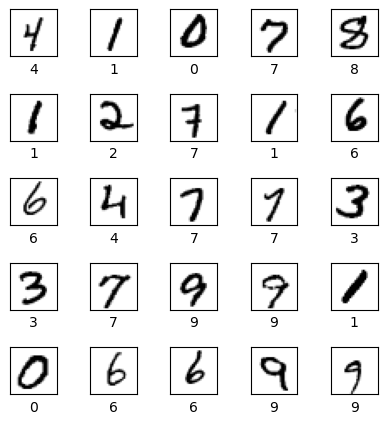

In [21]:
# Mostrar mas imagenes
plt.figure(figsize=(5,5))
plt.subplots_adjust(hspace=0.8)

for i, (imagen,etiqueta) in enumerate(datos_entrenamiento.take(25)):
    imagen = imagen.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagen,  cmap=plt.cm.binary)
    plt.xlabel(nombre_clases[etiqueta])
plt.show()

## MODELO CON LOS NODOS QUE INDICO

In [22]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),       # 784 nodos (28x28)
    tf.keras.layers.Dense(128, activation='relu'),          # 128 nodos en la capa oculta
    tf.keras.layers.Dense(10, activation='softmax')         # 10 nodos de salida (0 al 9)
])

C:\Users\sauln\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Definir los hiperparametros
epochs = 10
learning_rate = 0.0010
# Definir el tamaño del lote batch size
batch_size = 32

In [24]:
# Compilar el modelo
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(), # Entropia cruzada categorica dispersa
    metrics = ['accuracy']
)

In [26]:
# Obtener el numero de imagenes de entrenamiento y de prueba
num_img_entrenamiento = metadatos.splits['train'].num_examples
num_img_prueba = metadatos.splits['test'].num_examples
num_img_entrenamiento, num_img_prueba

(60000, 10000)

In [32]:
# Aplicar una estrategia para que el entrenamiento aprenda mas rapido y eficiente
# Y mejore la taza de aprendizaje
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_img_entrenamiento).batch(batch_size)
datos_prueba = datos_prueba.batch(batch_size)

In [39]:
# Entrenar el modelo
import math
steps_per_epoch = math.ceil(num_img_entrenamiento/batch_size)
historial = modelo.fit(datos_entrenamiento, epochs= epochs, steps_per_epoch = steps_per_epoch)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8806 - loss: 0.4248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9624 - loss: 0.1270
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9747 - loss: 0.0832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9811 - loss: 0.0631
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9854 - loss: 0.0489
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9897 - loss: 0.0328
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9918 - loss: 0.0271
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9934 - loss: 0.0220
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9947 - loss: 0.0176


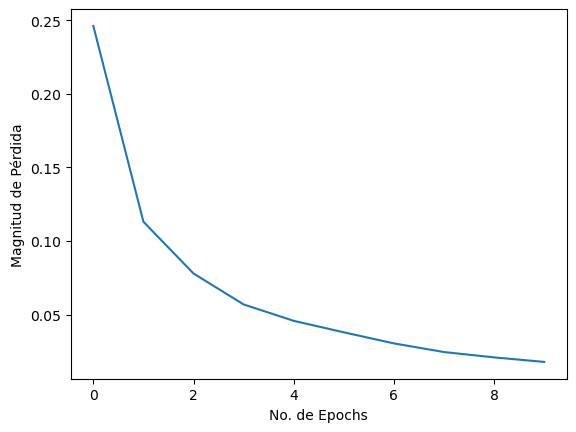

In [40]:
# Graficar la funcion de perdida por epoca
plt.xlabel('No. de Epochs')
plt.ylabel('Magnitud de Pérdida')
plt.plot(historial.history['loss'])

In [41]:
# Predecir todas las imagenes de prueba
for imagenes_prueba,etiquetas_prueba in datos_prueba.take(1):
    imagenes_prueba = imagenes_prueba.numpy()
    etiquetas_prueba = etiquetas_prueba.numpy()
    predicciones = modelo.predict(imagenes_prueba)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


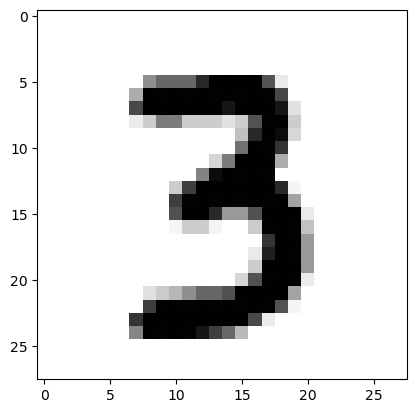

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
La prediccion es: 3


In [42]:
# Predecir nuestra propia imagen
index_imagen = 31
imagen = imagenes_prueba[index_imagen]
plt.imshow(np.reshape(imagen, (28,28)), cmap=plt.cm.binary)
plt.show()

# Realizar prediccion
imagen = np.array([imagen])
p = modelo.predict(imagen)
print(f"La prediccion es: {nombre_clases[np.argmax(p)]}")

# AQUI ESTA LA PRECICION AL 0.9766%

In [43]:
test_loss, test_accuracy=modelo.evaluate(datos_prueba, steps=math.ceil(num_img_prueba/32))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.0806


In [52]:
# Guardar modelo
#modelo.save("modelo_digitos.h5")

## ¿Qué pasa si quitas neuronas a la capa oculta?

Reducir la cantidad de neuronas en una capa oculta disminuye la capacidad de representación del modelo. Las neuronas en una red neuronal actúan como unidades que detectan patrones. Cuantas más neuronas haya, más patrones o relaciones complejas entre los datos podrá aprender la red.

## ¿Qué pasa si agregas más de 3 capas ocultas con 60 neuronas cada una?

Agregar más capas ocultas vuelve al modelo más profundo, permitiéndole aprender representaciones jerárquicas más complejas (por ejemplo, detectar bordes,formas y dígitos). Sin embargo, MNIST es un problema relativamente simple, y modelos muy profundos pueden ser innecesarios o incluso contraproducentes.

## ¿Qué pasa con una capa oculta de 128 neuronas?

Es una arquitectura lo suficientemente grande como para aprender los patrones de los dígitos sin ser excesivamente compleja. Basicamente es la que se recomienda ya que nuestro modelo es capaz de aprender bien con riesgos bajos de over o under fitting,A demas la probabilidad de precicion es alta como se observo antes arriba es del 97 porciento